In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set_theme()
np.random.seed(7)

# Loading Data

In [54]:
df = pd.read_pickle('../data/resulting_df.pkl')
df.head()

,Protein,Frequency,From,To,Position,Row,LeftAA,RightAA,LeftPol,RightPol,LeftVol,RightVol,LeftCharge,RightCharge,LeftHidro,RightHidro,LeftIsoEl,RightIsoEl
0,P0DTC1,0.000015,S,A,4393,0,Q,A,1,0,89.0,88.6,-0.539854,-0.204125,-0.8,1.8,5.240009,5.570017
1,P0DTC1,0.000015,S,L,4393,0,Q,A,1,0,89.0,166.7,-0.539854,-0.239898,-0.8,3.8,5.240009,5.525000
2,P0DTC1,0.000040,A,D,4394,1,S,D,0,1,88.6,111.1,-0.204125,-1.235597,1.8,-3.5,5.570017,4.299381
3,P0DTC1,0.000040,A,S,4394,1,S,D,0,1,88.6,89.0,-0.204125,-0.539854,1.8,-0.8,5.570017,5.240009
4,P0DTC1,0.000040,A,T,4394,1,S,D,0,1,88.6,116.1,-0.204125,-0.601803,1.8,-0.7,5.570017,5.184989


In [55]:
df.Frequency.sum()

5.66291

In [3]:
df.Protein = df.Protein.astype('category')

In [4]:
df.dtypes

Protein        category
Frequency       float64
From           category
To             category
Position          int64
Row               int64
LeftAA         category
RightAA        category
LeftPol           int64
RightPol          int64
LeftVol         float64
RightVol        float64
LeftCharge      float64
RightCharge     float64
LeftHidro       float64
RightHidro      float64
LeftIsoEl       float64
RightIsoEl      float64
dtype: object

# Visualizing Data

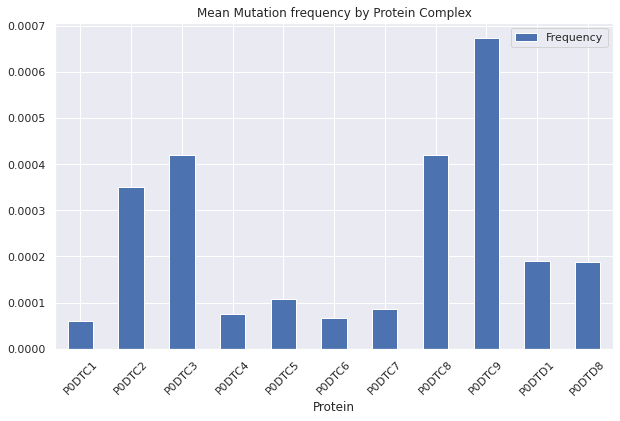

In [7]:
df[['Protein', 'Frequency']].groupby(['Protein'], as_index=False).mean().plot(x='Protein', 
                                                                              y='Frequency', 
                                                                              kind='bar',
                                                                              figsize=(10,6),
                                                                              rot=45)
plt.title("Mean Mutation frequency by Protein Complex");

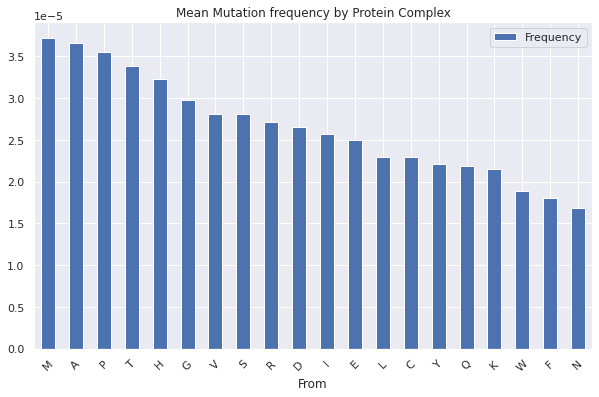

In [50]:
df[['From', 'Frequency']].groupby(['From'], as_index=False).mean().sort_values('Frequency', ascending=False).plot(x='From', 
                                                                  y='Frequency', 
                                                                  kind='bar',
                                                                  figsize=(10,6),
                                                                  rot=45)
plt.title("Mean Mutation frequency by Protein Complex");

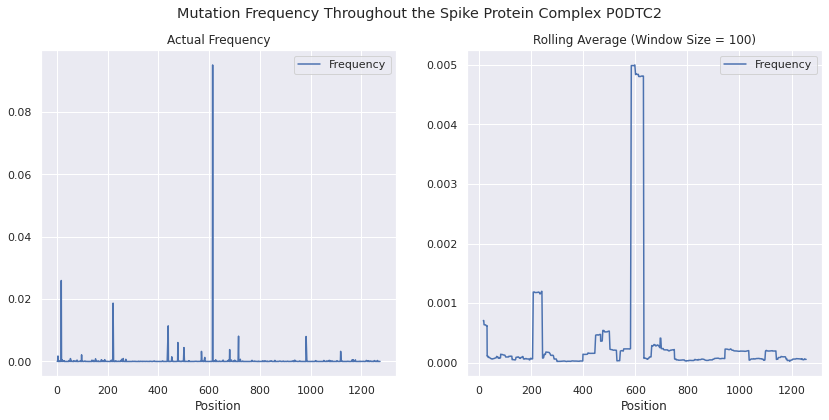

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Mutation Frequency Throughout the Spike Protein Complex P0DTC2")
prot_data = df.loc[df.Protein=='P0DTC2', ['Position', 'Frequency']]
prot_data.plot(ax=ax[0], x='Position', y='Frequency', title="Actual Frequency")
prot_data.rolling(100).mean().plot(ax=ax[1], x='Position', y='Frequency', title='Rolling Average (Window Size = 100)');

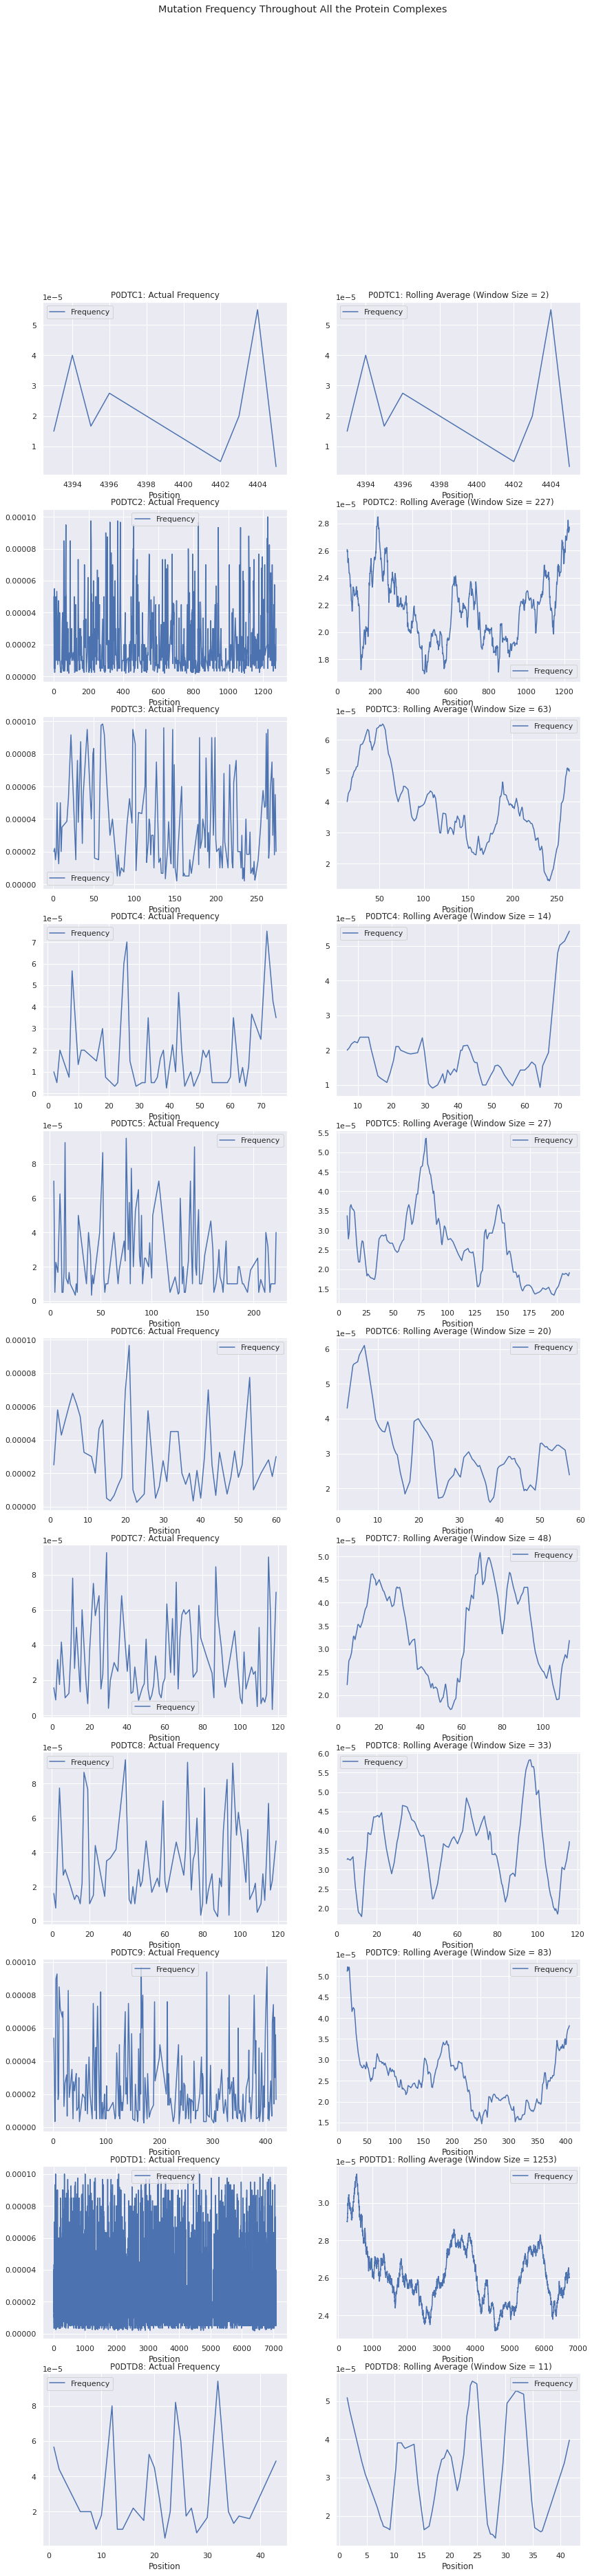

In [14]:
all_proteins = df.Protein.unique()
num_proteins = len(all_proteins)
fig, ax = plt.subplots((num_proteins), 2, figsize=(14, (num_proteins-1) * 6))
fig.suptitle("Mutation Frequency Throughout All the Protein Complexes")
for i, protein in enumerate(all_proteins):
    prot_data = df.loc[df.Protein==protein, ['Position', 'Frequency']]
    window_size = int(len(prot_data) * 0.1)''
    prot_data.plot(ax=ax[i, 0], x='Position', y='Frequency', title="{}: Actual Frequency".format(protein))
    prot_data.rolling(window_size).mean().plot(ax=ax[i, 1], x='Position', y='Frequency', title='{}: Rolling Average (Window Size = {})'.format(protein, window_size));

# Processing Categorical Features

### Approach 1: converting categories to integers

In [9]:
cat_df = df.copy()
cat_columns = cat_df.select_dtypes(include='category').columns
cat_df[cat_columns] = cat_df[cat_columns].apply(lambda x: x.cat.codes)
cat_df.head()

,Protein,Frequency,From,To,Position,Row,LeftAA,RightAA,LeftPol,RightPol,LeftVol,RightVol,LeftCharge,RightCharge,LeftHidro,RightHidro,LeftIsoEl,RightIsoEl
0,0,0.000015,15,0,4393,0,13,0,1,0,89.0,88.6,-0.539854,-0.204125,-0.8,1.8,5.240009,5.570017
1,0,0.000015,15,9,4393,0,13,0,1,0,89.0,166.7,-0.539854,-0.239898,-0.8,3.8,5.240009,5.525000
2,0,0.000040,0,2,4394,1,15,2,0,1,88.6,111.1,-0.204125,-1.235597,1.8,-3.5,5.570017,4.299381
3,0,0.000040,0,15,4394,1,15,2,0,1,88.6,89.0,-0.204125,-0.539854,1.8,-0.8,5.570017,5.240009
4,0,0.000040,0,16,4394,1,15,2,0,1,88.6,116.1,-0.204125,-0.601803,1.8,-0.7,5.570017,5.184989


In [10]:
oh_df = df.copy()  # one_hot_encoded_dataframe
oh_df = pd.get_dummies(oh_df, columns=cat_columns)
print(oh_df.shape)
print(list(oh_df.columns))

(23028, 105)
['Frequency', 'Position', 'Row', 'LeftPol', 'RightPol', 'LeftVol', 'RightVol', 'LeftCharge', 'RightCharge', 'LeftHidro', 'RightHidro', 'LeftIsoEl', 'RightIsoEl', 'Protein_P0DTC1', 'Protein_P0DTC2', 'Protein_P0DTC3', 'Protein_P0DTC4', 'Protein_P0DTC5', 'Protein_P0DTC6', 'Protein_P0DTC7', 'Protein_P0DTC8', 'Protein_P0DTC9', 'Protein_P0DTD1', 'Protein_P0DTD8', 'From_A', 'From_C', 'From_D', 'From_E', 'From_F', 'From_G', 'From_H', 'From_I', 'From_K', 'From_L', 'From_M', 'From_N', 'From_P', 'From_Q', 'From_R', 'From_S', 'From_T', 'From_V', 'From_W', 'From_Y', 'To_A', 'To_C', 'To_D', 'To_E', 'To_F', 'To_G', 'To_H', 'To_I', 'To_K', 'To_L', 'To_M', 'To_N', 'To_P', 'To_Q', 'To_R', 'To_S', 'To_T', 'To_V', 'To_W', 'To_Y', 'LeftAA_A', 'LeftAA_C', 'LeftAA_D', 'LeftAA_E', 'LeftAA_F', 'LeftAA_G', 'LeftAA_H', 'LeftAA_I', 'LeftAA_K', 'LeftAA_L', 'LeftAA_M', 'LeftAA_N', 'LeftAA_P', 'LeftAA_Q', 'LeftAA_R', 'LeftAA_S', 'LeftAA_T', 'LeftAA_V', 'LeftAA_W', 'LeftAA_Y', 'RightAA_A', 'RightAA_C', '

# Reducing Outliers

<AxesSubplot:xlabel='Frequency'>

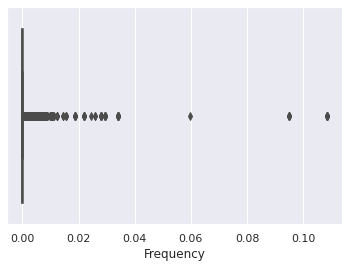

In [11]:
sns.boxplot(x=df.Frequency)

In [12]:
np.percentile(df.Frequency, 0.9)

2.5e-06

0.7748827514330381


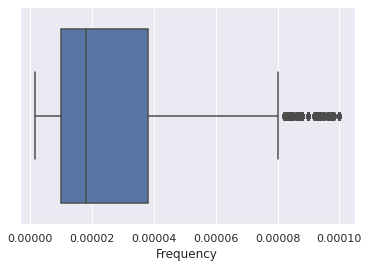

In [13]:
threshold = 0.0001
cut_freq = df.Frequency[df.Frequency<threshold]
print(len(cut_freq)/len(df))
sns.boxplot(x=cut_freq)
df = df[df.Frequency<threshold]

# Shuffling and Splitting Data
Into training and test sets

In [15]:
def get_train_test_idx(df, train_size):
    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)
    train_size = 0.8
    train_idx = idx[:int(train_size*n)]
    test_idx = idx[int(train_size*n):]
    assert len(train_idx) + len(test_idx) == len(idx)
    return train_idx, test_idx

def get_train_test_data(df, train_idx, test_idx, output='Frequency'):
    columns = df.columns
    X_train = df.iloc[train_idx, columns != output].values
    y_train = df[output].iloc[train_idx].values
    X_test = df.iloc[test_idx, columns != output].values
    y_test = df[output].iloc[test_idx].values
    return X_train, y_train, X_test, y_test

In [16]:
train_idx, test_idx = get_train_test_idx(df, train_size=0.8)

# Metrics

In [17]:
def get_metrics(y_pred, y_true):
    rms = mean_squared_error(y_test, y_pred, squared=False)
    mae = np.mean(abs(y_pred - y_test))
    print("RMSE: {}\tMAE: {}".format(rms, mae))
    return rms, mae

# Models
## Mean

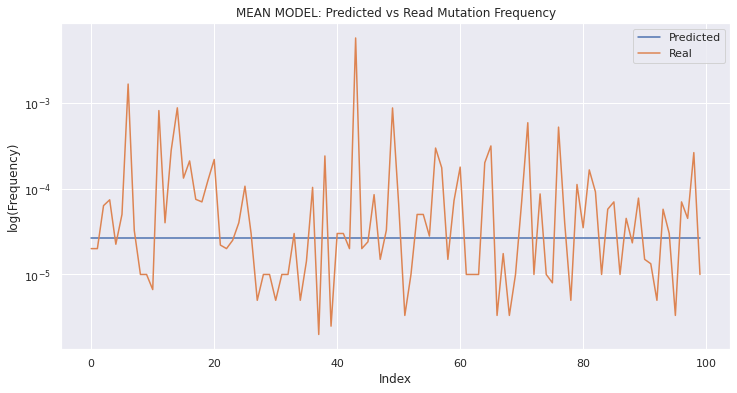

In [34]:
X_train, y_train, X_test, y_test = get_train_test_data(oh_df, train_idx, test_idx)
y_pred_mean = np.repeat(np.mean(df.Frequency), len(y_test))

# plt.plot(y_pred_mean[0:100])
# plt.plot(y_test[0:100])
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(y_pred_mean[0:100])
plt.plot(y_test[0:100])
plt.legend(['Predicted', 'Real'])
plt.title('MEAN MODEL: Predicted vs Read Mutation Frequency')
plt.ylabel('log(Frequency)')
plt.xlabel('Index')
plt.yscale('log');

In [19]:
rms_mean, mae_mean = get_metrics(y_pred_mean, y_test)

RMSE: 0.002285876000119744	MAE: 0.00023080996791260483


## Linear Regression

In [20]:
X_train, y_train, X_test, y_test = get_train_test_data(oh_df, train_idx, test_idx)
# numerical_features = ['LeftVol', 'RightVol', 'LeftCharge', 'RightCharge', 'LeftHidro', 'RightHidro', 'LeftIsoEl', 'RightIsoEl']
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.018357348456417233

In [21]:
reg.coef_

array([ 9.71920951e-09, -3.14149772e-08,  1.70024274e+02, -1.15672676e+03,
       -6.52546802e+00, -3.18409766e+01, -9.31087200e+04,  9.78465196e+03,
        4.03985471e+03,  5.79882619e+02,  3.47613708e+04, -3.96820427e+03,
        1.87167000e+04,  1.87167004e+04,  1.87167005e+04,  1.87167001e+04,
        1.87167002e+04,  1.87167002e+04,  1.87167002e+04,  1.87167005e+04,
        1.87167007e+04,  1.87167003e+04, -4.80806007e+03,  9.68919814e+03,
        4.37239429e+03, -2.07927110e+04, -2.38079191e+04,  4.54443184e+03,
        1.66249614e+04, -5.78351377e+03, -2.47471198e+03,  1.22109217e+04,
        3.53186443e+02, -7.66104089e+03,  2.93308618e+04,  2.53443982e+04,
        2.95246685e+04, -2.00020551e+04,  2.37691515e+02, -3.84495081e+03,
       -2.82513147e+03,  1.97392095e+04,  2.10626744e+04, -3.01322945e+03,
       -1.38780742e+03,  6.98374321e+03,  8.28310487e+03, -1.96229574e+02,
       -2.47356402e+03,  7.24410004e+03, -1.92074073e+03,  7.19028537e+03,
       -1.51482296e+03,  

In [22]:
reg.intercept_

-219639.6126085484

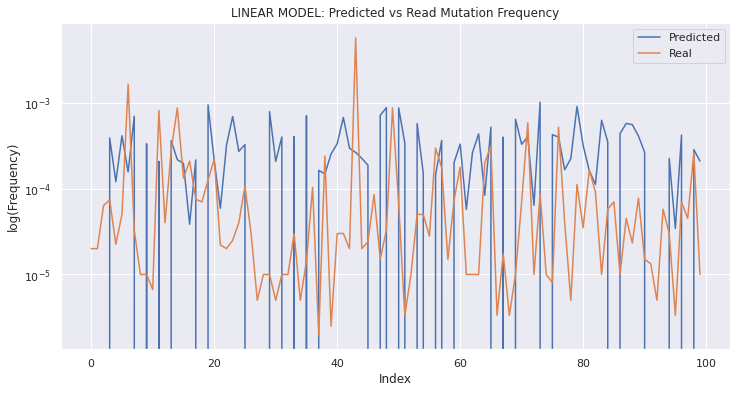

In [23]:
y_pred_linear = reg.predict(X_test)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(y_pred_linear[0:100])
plt.plot(y_test[0:100])
plt.legend(['Predicted', 'Real'])
plt.title('LINEAR MODEL: Predicted vs Read Mutation Frequency')
plt.ylabel('log(Frequency)')
plt.xlabel('Index')
plt.yscale('log');

In [24]:
rms_linear, mae_linear = get_metrics(y_pred_linear, y_test)

RMSE: 0.0022582281496103173	MAE: 0.0004183169085850885


# CART

In [25]:
from sklearn import tree
X_train, y_train, X_test, y_test = get_train_test_data(cat_df, train_idx, test_idx)
tree = tree.DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)
y_pred_cart = tree.predict(X_test)

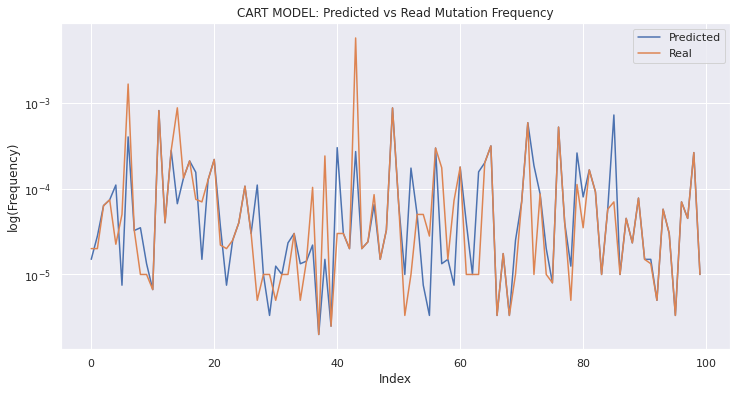

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(y_pred_cart[0:100])
plt.plot(y_test[0:100])
plt.legend(['Predicted', 'Real'])
plt.title('CART MODEL: Predicted vs Read Mutation Frequency')
plt.ylabel('log(Frequency)')
plt.xlabel('Index')
plt.yscale('log');

In [27]:
rms_cart, mae_cart = get_metrics(y_pred_cart, y_test)

RMSE: 0.0003591548812867494	MAE: 4.6920382526784884e-05


# Random Forests

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

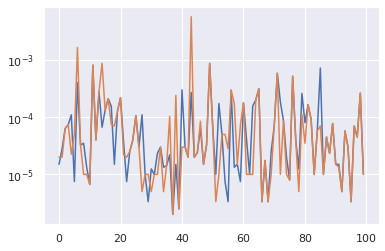

In [29]:
y_pred_rf = rf.predict(X_test)
plt.plot(y_pred_cart[0:100])
plt.plot(y_test[0:100])
plt.yscale('log')

In [30]:
rms_rf, mae_rf = get_metrics(y_pred_rf, y_test)

RMSE: 0.0006996261517831126	MAE: 0.000140541589022758


# Result Comparison

In [43]:
rms_list = [rms_mean, rms_linear, rms_cart, rms_rf]
mae_list = [mae_mean, mae_linear, mae_cart, mae_rf]
results_df = pd.DataFrame([rms_list, mae_list], index=['RMSE', 'MAE'], columns=['Mean', 'Linear', 'CART', 'RF'])
results_df = results_df.transpose()
results_df['Relative_RMSE'] = np.round(rms_list/rms_mean, 2)
results_df['Relative_MAE'] = np.round(mae_list/mae_mean, 2)
results_df

,RMSE,MAE,Relative_RMSE,Relative_MAE
Mean,0.002286,0.000231,1.00,1.00
Linear,0.002258,0.000418,0.99,1.81
CART,0.000359,0.000047,0.16,0.20
RF,0.000700,0.000141,0.31,0.61


## Feature Importance

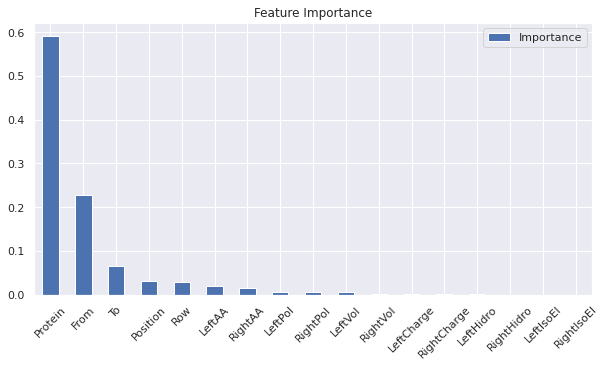

In [45]:
fi_df = pd.DataFrame(tree.feature_importances_, index=df.loc[:,df.columns!='Frequency'].columns, columns=["Importance"])
fi_df.sort_values(by='Importance', ascending=False).plot(kind='bar', rot=45, figsize=(10,5))
plt.xticks(range(len(fi_df.index)), fi_df.index);
plt.title("Feature Importance");

# Conclusões

- Ter um bom modelo preditivo pode ajudar a estimar o fit/prevalência de uma nova variante do SARS-CoV2 de acordo com suas mutações individuais

## Dificuldades/Desafios

- Não extraímos features estruturais pois as posições não coincidiram 
- 